In [1]:
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import time 
import sys 
sys.path.append('/Users/aleksandra/Desktop/Research/ILC_params/')

from HOD import *
from ilc_params import *

font = {'size'   : 16, 'family':'STIXGeneral'}
plt.rcParams.update({
     "text.usetex": True,
     "font.family": "serif",
     "font.sans-serif": ['Computer Modern']})
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})

# To-do:
parameters 

-lens mag terms 

- g1g2 terms
- flux cut 

In [2]:
color = "blue" 

In [3]:
nu_list = 93,100,143,145,217,225,280,353
nu_list_str = '93,100,143,145,217,225,280,353'

# nu_list = 93,100
# nu_list_str = '93,100'

path_save = "/Users/aleksandra/software/ILC_class-sz_curves_data/final_12-28/"
path_to_files = '/Users/aleksandra/software/class_sz/sz_auxiliary_files/'

save_to_file = "yes"

In [4]:
cib_flux = {}
cib_flux['100'] = 400
cib_flux['143'] = 350
cib_flux['217'] = 225
cib_flux['353'] = 315
cib_flux['545'] = 350
cib_flux['857'] = 710
cib_flux['3000'] = 1000


# flux cut, Table 1 in https://arxiv.org/pdf/1309.0382.pdf
cib_flux_list = []
keys = list(cib_flux.keys())

for i,nu in enumerate(nu_list):
    if str(nu) in keys: 
        cib_flux_list.append(cib_flux[str(nu)])
        print(cib_flux[str(nu)])
    else: 
        cib_flux_list.append(0.)
        print(0)
print("Flux cuts: ", cib_flux_list)

str(list(cib_flux_list))[1:-1]

0
400
350
0
225
0
0
315
Flux cuts:  [0.0, 400, 350, 0.0, 225, 0.0, 0.0, 315]


'0.0, 400, 350, 0.0, 225, 0.0, 0.0, 315'

In [5]:
if color=="blue":
    hod_pdict = blue_pdict
    s = s_blue
if color=="green":
    hod_pdict = green_pdict
    s = s_green
if color=="red":
    hod_pdict = red_pdict  
    s = s_red
    
hod_pdict['galaxy_sample_id']

'blue'

In [6]:
TCMB = 2.726 #Kelvin
TCMB_uK = 2.726e6 #micro-Kelvin
T_cmb = 2.726 #Kelvin
_h_P_=6.62606896e-34
_k_B_=1.3806504e-23


def plotfunction(linear=False, **kwargs):   
    plt.figure(figsize=(8,6))
    plt.title(r"", fontsize=30,  **kwargs )
    plt.xlabel(r"$\ell$", size=30)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)  
    plt.grid(which='both',alpha=0.2)
    plt.yscale("log")
    plt.xscale("log")
    if linear == True:
        plt.yscale("linear")
        plt.xscale("linear")
         
plotfunction

<function __main__.plotfunction(linear=False, **kwargs)>

# Frequency-independent

## CMB

In [7]:
common_settings_cmb = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl,pCl,lCl',
                   'lensing':'yes',
#                    # LambdaCDM parameters
#                    'h':0.67556,
#                    'omega_b':0.022032,
#                    'omega_cdm':0.12038,
#                    'A_s':2.215e-9,
#                    'n_s':0.9619,
#                    'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
                   # other output and precision parameters
                   'l_max_scalars':10000, 

}

In [8]:
M = Class()
M.set(common_settings_cmb)
M.set(p18_pdict)
M.compute()
cl_tot = M.raw_cl(10000)
cl_lensed = M.lensed_cl(10000)
ell = cl_tot['ell']
M.struct_cleanup()  # clean output
M.empty()           # clean input

factor = TCMB**2 * ell*(ell+1.)/2./np.pi

In [9]:
# noise 
ell_noise, cl_noise = np.loadtxt("/Users/aleksandra/Desktop/noise_curves_from_kSZ2X/nl_advact_20uK_1p5arcmin_uK2_170422.txt").T

## kSZ

In [10]:
# battaglia 12 kSZ theory computation. Patchy is before reionization, the other after reionization; should add these two
CellkSZhomog = np.loadtxt('/Users/aleksandra/Desktop/Research/ACTxDES/kSZ_filter/kSZ_theory_data/FBN_kSZ_PS.d.txt')
CellkSZpatchy = np.loadtxt('/Users/aleksandra/Desktop/Research/ACTxDES/kSZ_filter/kSZ_theory_data/FBN_kSZ_PS_patchy.d.txt')

#get rid of ell*(ell+1)/2pi factors  
ell_theory_battaglia = CellkSZhomog[:,0]
dl_kSZ_theory_battaglia = CellkSZhomog[:,1] + CellkSZpatchy[:,1]
cl_kSZ_theory_battaglia = (CellkSZhomog[:,1] + CellkSZpatchy[:,1]) * 2.0*np.pi/(ell_theory_battaglia)/(ell_theory_battaglia+1.0)


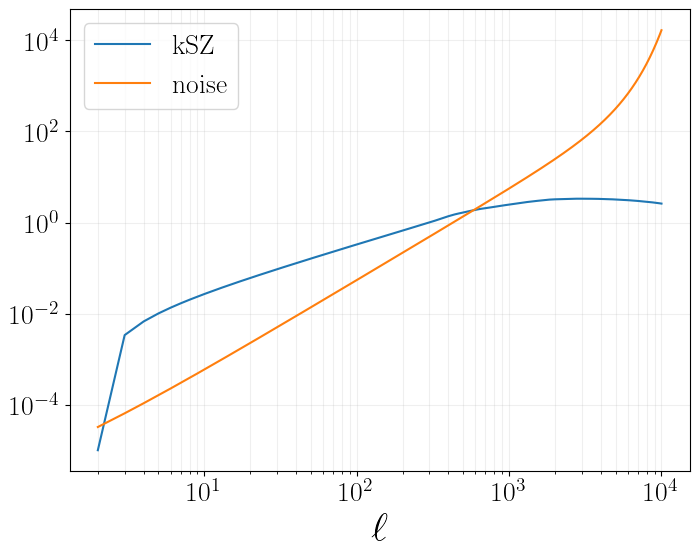

In [11]:
plotfunction()
plt.plot(ell_theory_battaglia , dl_kSZ_theory_battaglia, label = "kSZ")
plt.plot(ell_noise , ell_noise *(ell_noise +1)*cl_noise/2/np.pi, label = "noise")
plt.legend(fontsize=20)

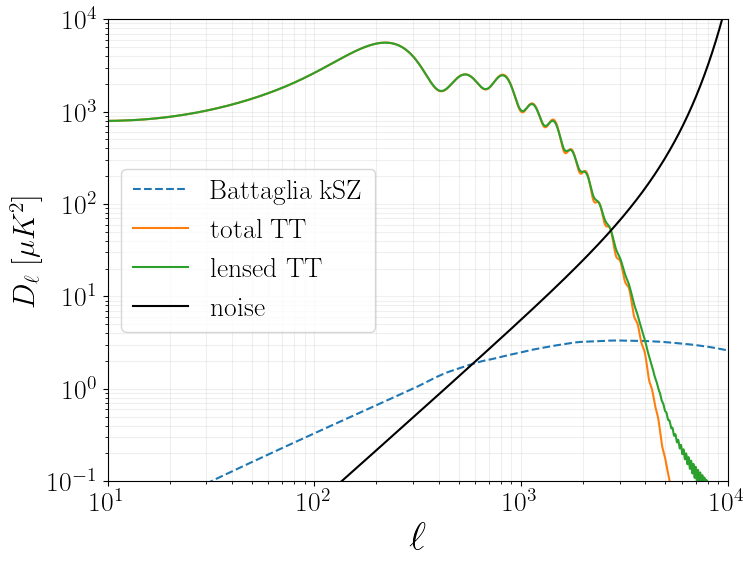

In [12]:
plotfunction()

plt.plot(ell_theory_battaglia, dl_kSZ_theory_battaglia,"--", label = "Battaglia kSZ")
plt.plot(ell, 1.e12*factor*cl_tot['tt'],label='total TT')
plt.plot(ell, 1.e12*factor*cl_lensed['tt'],label='lensed TT')
plt.plot(ell_noise , ell_noise *(ell_noise +1)*cl_noise/2/np.pi, color= "black", label="noise")

plt.xlim(10,1e4)
plt.ylim(1e-1,1e4)
plt.ylabel(r'$D_\ell$  [$\mu K^2$]',fontsize=22)
plt.legend(fontsize=20)

# Frequency-dependent

In [13]:
def convert_Jysr_to_uK(nu_in_GHz):
    # Appendix A of Fionas paper https://arxiv.org/pdf/2010.16405.pdf
    x = nu_in_GHz/56.233
    dB_MJy = 968*np.exp(x)*(nu_in_GHz/100)**4/(np.exp(x)-1)**2
    return dB_MJy


def tSZ_spectral_funct_at_nu_in_GHz(nu_in_GHz):
        T_cmb = 2.726
        frequency_in_Hz = nu_in_GHz*1e9
        Tcmb_gNU = T_cmb*((_h_P_*frequency_in_Hz/(_k_B_*T_cmb))*(1./np.tanh((_h_P_*frequency_in_Hz/(_k_B_*T_cmb))/2.))-4.)
        return Tcmb_gNU


In [ ]:
ti = time.perf_counter()

M = Class()
M.set(hod_pdict)
M.set(common_settings)
M.set(p18_pdict)
M.set(websky_tsz_pdict)
M.set(websky_cib_pdict)
 

M.set({
        'output':'cib_cib_1h,cib_cib_2h,tSZ_1h,tSZ_2h,gal_gal_1h,gal_gal_2h,tSZ_cib_1h,tSZ_cib_2h,gal_cib_1h,gal_cib_2h,tSZ_gal_1h,tSZ_gal_2h,tSZ_lensmag_1h,tSZ_lensmag_2h,gal_lensmag_1h,cib_lensmag_1h,cib_lensmag_2h,gal_lensmag_2h,lensmag_lensmag_1h,lensmag_lensmag_2h',
        'class_sz_verbose':1,
        })      

M.set({
        'cib_frequency_list_num' : len(nu_list),
        'cib_frequency_list_in_GHz' : nu_list_str,  
       
        'cib_Snu_cutoff_list [mJy]': str(list(cib_flux_list))[1:-1],
        'has_cib_flux_cut': 1
      })
M.compute()



In [ ]:
#auto
cl_gg = M.cl_gg() #gg
cl_cib_cib = M.cl_cib_cib() #cib 
cl_sz = M.cl_sz() #yy
#cross
cl_tsz_cib = M.cl_tSZ_cib()
cl_cib_g = M.cl_gal_cib()
cl_tsz_g = M.cl_yg()
# lensmag terms
cl_mumu = M.cl_mm()
cl_tsz_mu = M.cl_ym()
cl_cib_mu = M.cl_cib_lensmag()

In [ ]:
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

In [ ]:
cl_cib_cib

## tSZ

In [ ]:
plotfunction()
plt.title("$|$ tSZ $\\times$ tSZ $|$", fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l^{tSZ \times tSZ} / 2 \pi \,\,\, [\mu K^2]$", size=30)


yy = np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h'])
plt.plot(cl_sz['ell'],yy,":", label=r'yy')

for (i,nu) in enumerate(nu_list):
    plt.plot(cl_sz['ell'],yy*abs(tSZ_spectral_funct_at_nu_in_GHz(nu)**2),label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## CIB 

In [ ]:
plotfunction()
plt.ylabel(r"$\ell (\ell+1) C_l^{\nu \nu} / 2 \pi \,\,\, [Jy^2/sr]$", size=30)
plt.title(r'CIB $\times$ CIB', fontsize=30)


for (i,nu) in enumerate(nu_list):
    #CIB
    dls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])#/cls_to_dls
    dls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])#/cls_to_dls

    plt.plot(cl_cib_cib[str(nu)+'x'+str(nu)]['ell'], dls_cib_1h + dls_cib_2h, label=r' %.1i'%(nu))
    plt.plot(cl_cib_cib[str(nu)+'x'+str(nu)]['ell'], dls_cib_1h,"--",  label=r' %.1i, 1h'%(nu))
    plt.plot(cl_cib_cib[str(nu)+'x'+str(nu)]['ell'], dls_cib_2h, ":", label=r' %.1i, 2h'%(nu))

plt.legend(loc='right',  fontsize=20)    
  

In [ ]:
plotfunction()
plt.ylabel(r"$ \ell (\ell+1) C_l^{\nu \nu} / 2 \pi \,\,\, [\mu K^2]$", size=30)
plt.title(r'CIB $\times$ CIB', fontsize=30)

plt.xlim(100, 10000)

ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    #CIB
    dls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])/cls_to_dls
    dls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])/cls_to_dls
    plt.plot(cl_cib_cib[str(nu)+'x'+str(nu)]['ell'], cls_to_dls*(dls_cib_1h + dls_cib_2h)/ convert_Jysr_to_uK(nu) /convert_Jysr_to_uK(nu), label=r'%.1i GHz'%(nu))

plt.legend(loc='right',  fontsize=20)    
  

not reproducing Fig 3 in Fiona/Mat but params different ?


## tSZ x CIB

In [ ]:
ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    plotfunction()
    plt.xlabel(r"$\ell$", size=30)
    plt.ylabel(r"$ C_l^{\rm{y \times \nu}} \,\,\, [Jy/sr]$", size=30)
    plt.title(r'y $\times$ CIB %.1i GHz (assume CIB comes in Jy/sr)'%(nu), fontsize=30)

    spec = abs(tSZ_spectral_funct_at_nu_in_GHz(nu))
    
    #cl_yCIB = cl_yCIB_at_nu_in_GHz(cl_tsz_cib[str(nu)], nu)
    plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['1h']))/cls_to_dls,'--',color ="blue")#, label=r'1h,  %.1i'%(nu))
    plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['2h']))/cls_to_dls,'--',color="green")#, label=r'2h,  %.1i'%(nu))
    plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['1h'])+np.asarray(cl_tsz_cib[str(nu)]['2h']))/cls_to_dls,'-', color="red")#,label=r'$\nu$ = %.1i'%(nu))

    plt.legend(loc='right',  fontsize=12)    
  

In [ ]:
plotfunction()
plt.ylabel(r"$ C_l^{\rm{y \times \nu}} \,\,\, [Jy/sr]$", size=30)
plt.title(r'y $\times$ CIB', fontsize=30)


ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['1h'])+np.asarray(cl_tsz_cib[str(nu)]['2h']))/cls_to_dls,'-',label=r' %.1i GHz'%(nu))

plt.legend(loc='right',  fontsize=20)    
  

In [ ]:
plotfunction()
plt.ylabel(r"$\ell (\ell+1) C_l^{\rm{y \times \nu}} / 2 \pi  \ \ [Jy/sr]$", fontsize=30)
plt.title(r'y $\times$ CIB', fontsize=30)

ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['1h'])+np.asarray(cl_tsz_cib[str(nu)]['2h'])),'-',label=r'$\nu$ = %.1i'%(nu))

plt.legend(loc='right',  fontsize=20)    
  


In [ ]:
cl_tSZ_mu 

## tSZ x g 

In [ ]:
plotfunction()
plt.ylabel(r"$\ell (\ell+1) C_l^{\rm{tSZ \times g}} / 2 \pi \,\,\, [\mu K]$", fontsize=30)
plt.title(r'tSZ $\times$ g', fontsize=30)

for (i,nu) in enumerate(nu_list):
    yg = np.asarray(cl_tsz_g['1h'])+np.asarray(cl_tsz_g['2h'])
    ym = np.asarray(cl_tsz_mu['1h'])+np.asarray(cl_tsz_mu['2h'])
    plt.plot(cl_tszg['ell'],(yg+(5*s-2)*ym)*tSZ_spectral_funct_at_nu_in_GHz(nu),'-',label=r' %.1i GHz'%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## CIB x g 

In [ ]:
plotfunction()
plt.ylabel(r"$\ell (\ell+1) C_l^{\rm{CIB}xg} / 2 \pi \ \ [Jy/sr]$", fontsize=30)
plt.title(r'CIB $\times$ g [Jy/sr]', fontsize=30)


for (i,nu) in enumerate(nu_list):
    cl_cib_g_1h = np.asarray(cl_cib_g[str(nu_list[i])]['1h'])
    cl_cib_g_2h = np.asarray(cl_cib_g[str(nu_list[i])]['2h'])
    
    plt.plot(cl_cib_g[str(nu_list[1])]['ell'], cl_cib_g_1h , ":", label=r'%.1i GHz, 1h'%(nu))
    plt.plot(cl_cib_g[str(nu_list[1])]['ell'], cl_cib_g_2h , "--", label=r'%.1i GHz, 2h'%(nu))
    plt.plot(cl_cib_g[str(nu_list[1])]['ell'], cl_cib_g_2h +cl_cib_g_1h , "-", label=r'%.1i GHz'%(nu))

    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


In [ ]:
plotfunction()
plt.ylabel(r"$\ell (\ell+1) C_l^{\rm{CIB}xg} / 2 \pi \ [\mu K] $", fontsize=30)
plt.title(r'CIB $\times$ g', fontsize=30)


for (i,nu) in enumerate(nu_list):
    
    cl_cib_g_1h = np.asarray(cl_cib_g[str(nu_list[i])]['1h'])
    cl_cib_g_2h = np.asarray(cl_cib_g[str(nu_list[i])]['2h'])
    cl_cib_mu_1h = np.asarray(cl_cib_mu[str(nu_list[i])]['1h'])
    cl_cib_mu_2h = np.asarray(cl_cib_mu[str(nu_list[i])]['2h'])

    CIBg_uK = (cl_cib_g_1h + cl_cib_g_2h)/convert_Jysr_to_uK(nu)  
    CIBm_uK = (cl_cib_mu_1h + cl_cib_mu_2h)/convert_Jysr_to_uK(nu)
    plt.loglog(cl_cib_g[str(nu_list[1])]['ell'], CIBg_uK + (5*s-2)*CIBm_uK, label=r'%.1i GHz'%(nu))
    plt.loglog(cl_cib_g[str(nu_list[1])]['ell'], (5*s-2)*CIBm_uK , "--", label=r'lensmag %.1i GHz'%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

##  gg

In [ ]:
cl_gg_ell = np.asarray(cl_gg['ell'])
cl_gg_1h = np.asarray(cl_gg['1h'])
cl_gg_2h = np.asarray(cl_gg['2h'])

cl_to_dl_gg = cl_gg_ell*(cl_gg_ell+1)/2/np.pi

In [ ]:
cl_gg_1h+cl_gg_2h

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{gg} / 2 \pi $", fontsize=30)
plt.title('gg', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
#plt.xscale("log")

for (i,nu) in enumerate(nu_list): 
    plt.plot(cl_gg_ell, (cl_gg_1h+cl_gg_2h) , label=r'%.1i GHz'%(nu))
    

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

### Alex data

In [ ]:
path_data = "/Users/aleksandra/Desktop/HOD_unWISE/data_gg_kg/data_paper_HOD/"
path_cov = "/Users/aleksandra/Desktop/HOD_unWISE/data_gg_kg/data_paper_HOD/covariances/"

bpwf_gg = np.loadtxt(path_data+"cl_highL6000_sz_mask_C1+gaussian_filter20_windows_auto.txt")

if color == 'blue':
    alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample1.dat')
    cov =  np.loadtxt(path_cov +"Covariance_1111_blue.txt")
    A_shot_noise  = A_shot_noise_blue
    trans = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_blue_transfer_namaster.txt')
if color == 'green':
    alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample2.dat')
    cov = np.loadtxt(path_cov + "Covariance_2222_green.txt")
    A_shot_noise  = A_shot_noise_green
    trans = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_green_transfer_namaster.txt')
if color == 'red':
    alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample7.dat')
    cov = np.loadtxt(path_cov + "Covariance_7777_red.txt")
    #s = s_red
    A_shot_noise  = A_shot_noise_red
    trans = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_red_16.2_transfer_namaster.txt')

ell_alex, cl_alex, sigma_alex = alex[0], alex[1], alex[2]
cov_alex = cov
print(color)
print(hod_pdict['galaxy_sample_id'])
#print(cl_alex[:10])
print(A_shot_noise)

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$C_l^{gg}$", fontsize=30)
plt.title('gg', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
#plt.xscale("log")
plt.errorbar(ell_alex[1:10], (cl_alex)[1:10], yerr= sigma_alex[1:10], fmt = ".", color = color, capsize=4, label="Alex data")

shot_noise_gg = 1.81*1e-7*np.ones(10000)

plt.plot(cl_gg_ell, (cl_gg_1h+cl_gg_2h)/cl_to_dl_gg + 1.81*1e-7 , label=r'gg + shot noise')
plt.plot(shot_noise_gg, "--", label = "shot noise Alex")

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

In [ ]:
(cl_gg_1h+cl_gg_2h)/cl_to_dl_gg

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$C_l^{gg}$", fontsize=30)
plt.title('gg', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
#plt.xscale("log")
plt.xlim(10, 1.e3)

plt.errorbar(ell_alex[1:10], (cl_alex)[1:10], yerr= sigma_alex[1:10], fmt = ".", color = color, capsize=4, label="Alex data")

shot_noise_gg = 1.81*1e-7*np.ones(10000)

plt.plot(cl_gg_ell, (cl_gg_1h+cl_gg_2h)/cl_to_dl_gg + 0.92*1e-7 , label=r'gg + shot noise')
plt.plot(shot_noise_gg, "--", label = "shot noise Alex")

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

missing the magnification terms 

# Plot everything 

In [ ]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    plotfunction()
    #plt.figure(figsize=(12,8), dpi=250)
    plt.xlabel(r"$\ell$", fontsize=30)
    plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
    plt.title(str(nu_list[i])+' GHz $\\times$ '+str(nu_list[i])+' GHz', fontsize=30)
    
    ## CMB
    plt.plot(ell, 1.e12*factor*cl_tot['tt'],label='total TT')
    plt.plot(ell, 1.e12*factor*cl_lensed['tt'],".",label='lensed TT')    
    ## kSZ
    #plt.plot(ell_theory_battaglia, dl_kSZ_theory_battaglia, color = "red", label = "kSZ (Battaglia) ")
    plt.plot(ell_theory_battaglia, CellkSZhomog[:,1], color = "red", label = "kSZ late (Battaglia) ")
    plt.plot(ell_theory_battaglia, CellkSZpatchy[:,1],"--",  color = "red", label = "kSZ patchy (Battaglia) ")

    ## tSZ
    #plt.plot(cls_tSZ[i]['ell'],cls_tSZ[i]['1h']+cls_tSZ[i]['2h'], color="blue", label=r'tSZ')
    tsz_tsz = yy*abs(tSZ_spectral_funct_at_nu_in_GHz(nu)**2)
    plt.plot(cl_sz['ell'],tsz_tsz, color="blue", label=r'tSZ')
      
    ## CIB
    cls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])
    cls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    CIB_uK = (cls_cib_1h+cls_cib_2h) / convert_Jysr_to_uK(nu) /convert_Jysr_to_uK(nu)
    plt.plot(cl_cib_cib[str(nu_list[1])+'x'+str(nu_list[1])]['ell'], CIB_uK, label=r'CIB')
    
    ## gg
    plt.plot(cl_gg_ell, cl_gg_1h+cl_gg_2h ,color="brown", label=r'gg (unitless)')
    
   ## noise
    plt.plot(ell_noise, ell_noise*(ell_noise+1)*cl_noise/2/np.pi, ":", color = "black", label="noise AdvACT")
    
    plt.xlim(10, 8.e3)
    plt.ylim(1e-4,6.e3)  

    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

    ##Save the curves
    if save_to_file == "yes":
        np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_CIBxCIB.txt", (cl_cib_cib[str(nu_list[1])+'x'+str(nu_list[1])]['ell'], CIB_uK))
        np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_tSZxtSZ.txt", (cl_sz['ell'],tsz_tsz))
if save_to_file == "yes":
    np.savetxt(path_save+"ell_dl_CMB_lensed.txt", (ell, 1.e12*factor*cl_lensed['tt']))
    np.savetxt(path_save+"ell_dl_CMB.txt", (ell, 1.e12*factor*cl_tot['tt']))
    np.savetxt(path_save+"ell_dl_gg_"+color+".txt", (cl_gg_ell, cl_gg_1h+cl_gg_2h))


In [ ]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    plt.figure(figsize=(12,8), dpi=250)
    plt.xlabel(r"$\ell$", fontsize=30)
    plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
    plt.title(str(nu_list[i])+' GHz $\\times$ '+str(nu_list[i])+' GHz', fontsize=30)
    
    # CMB
    plt.plot(ell, 1.e12*factor*cl_tot['tt'],label='total TT')  
    ## gg
    plt.plot(cl_gg_ell, cl_gg_1h+cl_gg_2h ,color="brown", label=r'gg')
    
    # tSZ x g
    yg = np.asarray(cl_tsz_g['1h'])+np.asarray(cl_tsz_g['2h'])
    ym = np.asarray(cl_tsz_mu['1h'])+np.asarray(cl_tsz_mu['2h'])
    tSZg_uK = yg*tSZ_spectral_funct_at_nu_in_GHz(nu)
    tSZm_uK = ym*tSZ_spectral_funct_at_nu_in_GHz(nu)
    plt.plot(cl_tszg['ell'],abs(tSZg_uK+(5*s-2)*tSZm_uk ), "--",color="lightblue", label=r'$|$tSZ x g$|$')
    
    #CIB x g 
    cl_cib_g_1h = np.asarray(cl_cib_g[str(nu_list[i])]['1h'])
    cl_cib_g_2h = np.asarray(cl_cib_g[str(nu_list[i])]['2h'])
    cl_cib_mu_1h = np.asarray(cl_cib_mu[str(nu_list[i])]['1h'])
    cl_cib_mu_2h = np.asarray(cl_cib_mu[str(nu_list[i])]['2h'])
    CIBg_uK = (cl_cib_g_1h + cl_cib_g_2h)/convert_Jysr_to_uK(nu)
    CIBm_uK = (cl_cib_mu_1h + cl_cib_mu_2h)/convert_Jysr_to_uK(nu)
    plt.plot(cl_cib_g[str(nu_list[1])]['ell'], CIBg_uK +(5*s-2)*CIBm_uK, color="lightgreen", label=r'CIB $\times$ g')

    #tSZ x CIB 
    ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
    cl_tsz_cib_1h = np.asarray(cl_tsz_cib[str(nu)]['1h'])
    cl_tsz_cib_2h = np.asarray(cl_tsz_cib[str(nu)]['2h'])
    CIBtSZ_uK = (cl_tsz_cib_1h+cl_tsz_cib_2h)*tSZ_spectral_funct_at_nu_in_GHz(nu)/ convert_Jysr_to_uK(nu)
    plt.plot(ell_tsz_cib, abs(CIBtSZ_uK), label=r'$|$ tSZ $\times$ CIB $|$')
    
    #noise
    plt.plot(ell_noise, ell_noise*(ell_noise+1)*cl_noise/2/np.pi, ":", color = "black", label="noise AdvACT")
    
    
    plt.yscale("log")
    plt.xscale("log")
    plt.xlim(10, 8.e3)
    #plt.ylim(1e-4,6.e3)  
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(which='both',alpha=0.2)
    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

    ##Save the curves
    if save_to_file == "yes":
        np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_tSZxCIB.txt", (ell_tsz_cib, CIBtSZ_uK))
        np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_tSZxg_"+color+".txt", (cl_tszg['ell'], tSZg_uK))
        np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_CIBxg_"+color+".txt", (cl_cib_g[str(nu_list[1])]['ell'], CIBg_uK))
        np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_tSZxg_wLensmag_"+color+".txt", (cl_tszg['ell'], tSZg_uK+(5*s-2)*tSZm_uk))
        np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_CIBxg_wLensmag_"+color+".txt", (cl_cib_g[str(nu_list[1])]['ell'], CIBg_uK +(5*s-2)*CIBm_uK))
        np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_tSZxm_"+color+".txt", (cl_tszg['ell'], tSZm_uk)
        np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_CIBxm_"+color+".txt", (cl_cib_g[str(nu_list[1])]['ell'],CIBm_uK))


# Plot cross frequencies 

## CIB x CIB

In [ ]:
plotfunction()
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
plt.title(r"CIB \ $\times$ \ CIB", fontsize =30)
  


for (i,nu1) in enumerate(nu_list):
    for (j,nu2) in enumerate(nu_list):
        if nu1!=nu2:
            nu1_nu2 = str(nu1)+"x"+str(nu2)
            nu2_nu1 = str(nu2)+"x"+str(nu1)
            if nu1_nu2 in cl_cib_cib:
                print(nu1_nu2)
                cl_cib_1h = np.asarray(cl_cib_cib[nu1_nu2]['1h'])
                cl_cib_2h = np.asarray(cl_cib_cib[nu1_nu2]['2h'])
                cl_cib_uK = (cl_cib_1h+cl_cib_2h) / convert_Jysr_to_uK(nu1) /convert_Jysr_to_uK(nu2)
                plt.plot(cl_cib_cib[str(nu_list[1])+'x'+str(nu_list[1])]['ell'], cl_cib_uK, label=r"%.1i  $\times$ %.1i "%(nu1,nu2))#str(mu)+"x"+str(niu))
                if save_to_file == "yes":
                    np.savetxt(path_save+'ell_dl_'+str(nu1)+"x"+str(nu2)+"_GHz_CIBxCIB.txt", ( cl_cib_cib[str(nu_list[1])+'x'+str(nu_list[1])]['ell'], cl_cib_uK ) )
                    np.savetxt(path_save+'ell_dl_'+str(nu2)+"x"+str(nu1)+"_GHz_CIBxCIB.txt", ( cl_cib_cib[str(nu_list[1])+'x'+str(nu_list[1])]['ell'], cl_cib_uK ) )

        
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## tSZ x tSZ 

In [ ]:
# function used to compute tsz at nu (inside class-sz)
def cl_sz_at_nu1_nu2_in_GHz_in_microK2(cl_sz, nu1_in_GHz, nu2_in_GHz):
    print(nu1_in_GHz, nu2_in_GHz)
    frequency1_in_Hz, frequency2_in_Hz = nu1_in_GHz*1e9, nu2_in_GHz*1e9
    Tcmb_gNU1 = TCMB*((_h_P_*frequency1_in_Hz/(_k_B_*TCMB))*(1./np.tanh((_h_P_*frequency1_in_Hz/(_k_B_*TCMB))/2.))-4.)
    Tcmb_gNU2 = TCMB*((_h_P_*frequency2_in_Hz/(_k_B_*TCMB))*(1./np.tanh((_h_P_*frequency2_in_Hz/(_k_B_*TCMB))/2.))-4.)
    
    r = {}
    r['ell'] = np.asarray(cl_sz['ell'])
    r['1h'] = np.asarray(cl_sz['1h'])*Tcmb_gNU1*Tcmb_gNU2
    r['2h'] = np.asarray(cl_sz['2h'])*Tcmb_gNU1*Tcmb_gNU2
    return r

In [ ]:
plotfunction()
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
plt.title(r"$|$ tSZ \ $\times$ \ tSZ $|$", fontsize =30)

for (i,nu1) in enumerate(nu_list):
    for (j,nu2) in enumerate(nu_list):
        if nu1!=nu2:
            cl_tsz_cross = ( np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h']) )*tSZ_spectral_funct_at_nu_in_GHz(nu1)*tSZ_spectral_funct_at_nu_in_GHz(nu2)
            plt.plot(cl_sz['ell'], abs(cl_tsz_cross), label=r"%.1i $\times$ %.1i"%(nu1, nu2))
            if save_to_file == "yes":
                np.savetxt(path_save+'ell_dl_'+str(nu1)+"x"+str(nu2)+"_GHz_tSZxtSZ.txt", ( cl_sz['ell'], cl_tsz_cross ) )
                np.savetxt(path_save+'ell_dl_'+str(nu2)+"x"+str(nu1)+"_GHz_tSZxtSZ.txt", ( cl_sz['ell'], cl_tsz_cross ) )

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


In [ ]:
for (i,nu_cib) in enumerate(nu_list):
    plotfunction()
    plt.xlabel(r"$\ell$", size=30)
    plt.ylabel(r"$ C_l^{\rm{ tSZ \times \nu}} \,\,\, [\mu K^2]$", fontsize=30)
    plt.title(r' $|$ tSZ $\times$ CIB  $|$', fontsize=30)

    
    ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_cib)]['ell'])
    cl_tsz_cib_1h = np.asarray(cl_tsz_cib[str(nu_cib)]['1h'])
    cl_tsz_cib_2h = np.asarray(cl_tsz_cib[str(nu_cib)]['2h'])  
    CIBy_uK = (cl_tsz_cib_1h+cl_tsz_cib_2h)/ convert_Jysr_to_uK(nu_cib)
    

    for (j,nu_sz) in enumerate(nu_list):
        if nu_sz!=nu_cib:
            CIBtSZ_uK = CIBy_uK*tSZ_spectral_funct_at_nu_in_GHz(nu_sz)
            plt.plot(ell_tsz_cib, abs(CIBtSZ_uK),'-',label=r'%.1i $\times$ %.1i '%(nu_sz, nu_cib))
            if save_to_file == "yes":
                np.savetxt(path_save+"ell_dl_"+str(nu_sz)+"x"+str(nu_cib)+"_GHz_tSZxCIB.txt", ( ell_tsz_cib, (CIBtSZ_uK)) )
                np.savetxt(path_save+"ell_dl_"+str(nu_cib)+"x"+str(nu_sz)+"_GHz_CIBxtSZ.txt", ( ell_tsz_cib, (CIBtSZ_uK)) )

    plt.legend(loc='right',  fontsize=20)    
  

## tSZ x CIB

In [ ]:
# assuming cl_tSZ_CIB is already multiplied by the spectral response function 

def cl_yCIB_at_nu_in_GHz(cl_sz_cib, nu_in_GHz):
    print(nu_in_GHz)
    frequency_in_Hz= nu_in_GHz*1e9
    Tcmb_gNU1 = TCMB*((_h_P_*frequency_in_Hz/(_k_B_*TCMB))*(1./np.tanh((_h_P_*frequency_in_Hz/(_k_B_*TCMB))/2.))-4.)
    
    yCIB = {}
    yCIB['ell'] = np.asarray(cl_sz_cib['ell'])
    yCIB['1h'] = np.asarray(cl_sz_cib['1h'])/Tcmb_gNU1
    yCIB['2h'] = np.asarray(cl_sz_cib['2h'])/Tcmb_gNU1
    return yCIB

In [ ]:
for (i,nu_cib) in enumerate(nu_list):
    plotfunction()
    plt.ylabel(r"$ C_l^{\rm{ tSZ \times \nu}} \,\,\, [\mu K^2]$", fontsize=30)
    plt.title(r' $|$ tSZ $\times$ CIB  $|$', fontsize=30)
    
    ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_cib)]['ell'])
    cl_tsz_cib_1h = np.asarray(cl_tsz_cib[str(nu_cib)]['1h'])
    cl_tsz_cib_2h = np.asarray(cl_tsz_cib[str(nu_cib)]['2h'])  
    CIBy_uK = (cl_tsz_cib_1h+cl_tsz_cib_2h)/ convert_Jysr_to_uK(nu_cib)
    

    for (j,nu_sz) in enumerate(nu_list):
        if nu_sz!=nu_cib:
            CIBtSZ_uK = CIBy_uK*tSZ_spectral_funct_at_nu_in_GHz(nu_sz)
            plt.plot(ell_tsz_cib, abs(CIBtSZ_uK),'-',label=r'%.1i $\times$ %.1i '%(nu_sz, nu_cib))
            if save_to_file == "yes":
                np.savetxt(path_save+"ell_dl_"+str(nu_sz)+"x"+str(nu_cib)+"_GHz_tSZxCIB.txt", ( ell_tsz_cib, (CIBtSZ_uK)) )
                np.savetxt(path_save+"ell_dl_"+str(nu_cib)+"x"+str(nu_sz)+"_GHz_CIBxtSZ.txt", ( ell_tsz_cib, (CIBtSZ_uK)) )

    plt.legend(loc='right',  fontsize=20)    
  

In [ ]:
for (i,nu_cib) in enumerate(nu_list):
    plotfunction()
    plt.xlabel(r"$\ell$", size=30)
    plt.ylabel(r"$ C_l^{\rm{ tSZ \times \nu}} \,\,\, [\mu K^2]$", size=30)
    plt.title(r' $|$ tSZ $\times$ CIB  $|$', fontsize=30)

    
    ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_cib)]['ell'])
    cl_tsz_cib_1h = np.asarray(cl_tsz_cib[str(nu_cib)]['1h'])
    cl_tsz_cib_2h = np.asarray(cl_tsz_cib[str(nu_cib)]['2h'])  
    CIBy_uK = (cl_tsz_cib_1h+cl_tsz_cib_2h)/ convert_Jysr_to_uK(nu_cib)
    

    for (j,nu_sz) in enumerate(nu_list):
        if nu_sz!=nu_cib:
            CIBtSZ_uK = CIBy_uK*tSZ_spectral_funct_at_nu_in_GHz(nu_sz)
            plt.plot(ell_tsz_cib, abs(CIBtSZ_uK),'-',label=r'%.1i $\times$ %.1i '%(nu_sz, nu_cib))
            if save_to_file == "yes":
                np.savetxt(path_save+"ell_dl_"+str(nu_sz)+"x"+str(nu_cib)+"_GHz_tSZxCIB.txt", ( ell_tsz_cib, (CIBtSZ_uK)) )

    plt.legend(loc='right',  fontsize=20)    
  

# CIB x tSZ all plot

In [ ]:
for (i,nu1) in enumerate(nu_list):
    for (j,nu2) in enumerate(nu_list):
        if nu1>=nu2:
            plotfunction()
            plt.title(r'%.1i $\times$ %.1i'%(nu1, nu2), fontsize=30)
            plt.ylabel(r"$ C_l \,\,\, [Jy^2/sr]$", size=30)
 

            #CIB
            nu1_nu2 = str(nu1)+"x"+str(nu2)
            cl_cib_1h = np.asarray(cl_cib_cib[nu1_nu2]['1h'])
            cl_cib_2h = np.asarray(cl_cib_cib[nu1_nu2]['2h'])
            cl_cib_Jy2sr = (cl_cib_1h+cl_cib_2h)

            #tSZ
            cl_tsz = yy*tSZ_spectral_funct_at_nu_in_GHz(nu1)*tSZ_spectral_funct_at_nu_in_GHz(nu2)
            cl_tsz_Jy2sr= cl_tsz * convert_Jysr_to_uK(nu1) * convert_Jysr_to_uK(nu2)

            #tSZ x CIB (assume in uK)
            cl_tsz_cib_1h = np.asarray(cl_tsz_cib[str(nu1)]['1h'])
            cl_tsz_cib_2h = np.asarray(cl_tsz_cib[str(nu1)]['2h'])  
            CIBy_uK = (cl_tsz_cib_1h+cl_tsz_cib_2h) * convert_Jysr_to_uK(nu1)
            CIBtSZ_uK = CIBy_uK*tSZ_spectral_funct_at_nu_in_GHz(nu2) * convert_Jysr_to_uK(nu2)

            cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi
            plt.plot(ell_tsz_cib, abs(CIBtSZ_uK/cls_to_dls), color="red", label="tSZ x CIB")
            plt.plot(ell_tsz_cib, abs(cl_tsz_Jy2sr/cls_to_dls), color="blue", label="tSZ")
            plt.plot(ell_tsz_cib, abs(cl_cib_Jy2sr/cls_to_dls), color="black", label="CIB")
            #np.savetxt(path_save+"ell_dl_"+str(nu_sz)+"x"+str(nu_cib)+"_GHz_tSZxCIB.txt", ( ell_tsz_cib, (CIBtSZ_uK)) )

            plt.legend(loc='right',  fontsize=20)    
  

# CIB - g 

In [ ]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    plotfunction()
    plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
    plt.title(str(nu_list[i])+' GHz $\\times$ '+str(nu_list[i])+' GHz', fontsize=30)

    plt.xlim(10, 8.e3)
    #plt.ylim(1e-4,6.e3)  

    
    ## gg
    plt.plot(cl_gg_ell, cl_gg_1h+cl_gg_2h ,color="brown",linewidth=2, label=r'gg')
    plt.plot(cl_gg_ell, cl_gg_1h , "--", color="brown", label=r'gg 1h ')
    plt.plot(cl_gg_ell, cl_gg_2h , ":", color="brown", label=r'gg 2h ')  
    
    #CIB x g 
    cl_cib_g_1h = np.asarray(cl_cib_g[str(nu_list[i])]['1h'])
    cl_cib_g_2h = np.asarray(cl_cib_g[str(nu_list[i])]['2h'])
    cl_cib_mu_1h = np.asarray(cl_cib_mu[str(nu_list[i])]['1h'])
    cl_cib_mu_2h = np.asarray(cl_cib_mu[str(nu_list[i])]['2h'])
    
    CIBg_uK = (cl_cib_g_1h + cl_cib_g_2h)/convert_Jysr_to_uK(nu)
    CIBg_uK_1h = (cl_cib_g_1h)/convert_Jysr_to_uK(nu)
    CIBg_uK_2h = ( cl_cib_g_2h)/convert_Jysr_to_uK(nu)
    CIBm_uK = (cl_cib_mu_1h + cl_cib_mu_2h)/convert_Jysr_to_uK(nu)
    plt.plot(cl_cib_g[str(nu_list[1])]['ell'], CIBg_uK + (5*s-2)*CIBm_uK, color="green", linewidth=2, label=r'CIB $\times$ g')
    plt.plot(cl_cib_g[str(nu_list[1])]['ell'], CIBg_uK_1h , "--", color="green", label=r'CIB $\times$ g, 1h')
    plt.plot(cl_cib_g[str(nu_list[1])]['ell'], CIBg_uK_2h , ":", color="green", label=r'CIB $\times$ g, 2h')
 
   ## CIB
    cls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])
    cls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    CIB_uK = (cls_cib_1h+cls_cib_2h) / convert_Jysr_to_uK(nu) /convert_Jysr_to_uK(nu)
    CIB_uK_1h = (cls_cib_1h) / convert_Jysr_to_uK(nu) /convert_Jysr_to_uK(nu)
    CIB_uK_2h = (cls_cib_2h) / convert_Jysr_to_uK(nu) /convert_Jysr_to_uK(nu)

    plt.plot(cl_cib_cib[str(nu_list[1])+'x'+str(nu_list[1])]['ell'], CIB_uK, color="blue", linewidth=2,  label=r'CIB')
    plt.plot(cl_cib_cib[str(nu_list[1])+'x'+str(nu_list[1])]['ell'], CIB_uK_1h,"--", color="blue", label=r'CIB, 1h ')
    plt.plot(cl_cib_cib[str(nu_list[1])+'x'+str(nu_list[1])]['ell'], CIB_uK_2h,":", color="blue", label=r'CIB, 2h ')

    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=15)



# correlation coefficients 

eq. 38 in https://arxiv.org/pdf/2006.16329.pdf

## CIB x tSZ

In [ ]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

plt.figure(figsize=(12,8), dpi=150)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('CIB x tSZ', fontsize=30)
plt.xscale('log')
for (i,nu) in enumerate(nu_list):  
    ## tSZ
    tsz_tsz = yy
      
    ## CIB
    cls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])#/cls_to_dls
    cls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])#/cls_to_dls
    CIB_uK = (cls_cib_1h+cls_cib_2h) 
  
    #tSZ x CIB 
    ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
    cl_tsz_cib_1h = np.asarray(cl_tsz_cib[str(nu)]['1h'])
    cl_tsz_cib_2h = np.asarray(cl_tsz_cib[str(nu)]['2h'])
    CIBtSZ_uK = (cl_tsz_cib_1h+cl_tsz_cib_2h) # convert_Jysr_to_uK(nu)
    
    corr = CIBtSZ_uK/2/np.sqrt(CIB_uK*tsz_tsz)   
    plt.plot(ell_tsz_cib, corr, label = "%.1i GHZ"%(nu))
    
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(which='both',alpha=0.2)
    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

 

##  tSZ x g 


In [ ]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('tSZ x g %.6s'%(color), fontsize=30)
plt.xscale('log')
for (i,nu) in enumerate(nu_list):  
    ## tSZ
    tsz_tsz = yy*tSZ_spectral_funct_at_nu_in_GHz(nu)**2
      
   # tSZ x g
    yg = np.asarray(cl_tszg['1h'])+np.asarray(cl_tszg['2h'])
    tSZg_uK = yg*tSZ_spectral_funct_at_nu_in_GHz(nu)
    
    #shot noise
    SN = 1.81*1e-7 * (ell_tsz_cib)*(ell_tsz_cib+1) /2/np.pi
    
    corr = tSZg_uK/np.sqrt((cl_gg_1h+cl_gg_2h+SN)*tsz_tsz)   
    plt.plot(ell_tsz_cib, corr, label = "%.1i GHz"%(nu))
    
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(which='both',alpha=0.2)
    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

 

## CIB x g 

In [ ]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

plt.figure(figsize=(8,6))
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('CIB x g %.6s'%(color), fontsize=30)
plt.xscale('log')
for (i,nu) in enumerate(nu_list):  
    ## CIB
    cls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])#/cls_to_dls
    cls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])#/cls_to_dls
    CIB_uK = (cls_cib_1h+cls_cib_2h) #/ convert_Jysr_to_uK(nu) /convert_Jysr_to_uK(nu)
     
    ## gg
    #plt.plot(cl_gg_ell, cl_gg_1h+cl_gg_2h ,color="brown", label=r'gg')
    
    #CIB x g 
    cl_cib_g_1h = np.asarray(cl_cib_g[str(nu_list[i])]['1h'])
    cl_cib_g_2h = np.asarray(cl_cib_g[str(nu_list[i])]['2h'])
    CIBg_uK = (cl_cib_g_1h + cl_cib_g_2h)
 
    #shot noise
    SN_gg = 1.81*1e-7 * (ell_tsz_cib)*(ell_tsz_cib+1) /2/np.pi
    
    corr = CIBg_uK /np.sqrt((cl_gg_1h+cl_gg_2h+SN_gg)*CIB_uK)   
    plt.plot(ell_tsz_cib, corr, label = "%.1i GHz"%(nu))
    
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(which='both',alpha=0.2)
    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

 